### Marketing A/B Testing

- Would the campaign be successful?
- 
If the campaign was successful, how much of that success could be attributed to the ads?

"Converted" variable evaluating to either True or False is used to determine whether a campaign is successful or not, this makes it the target variable

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (11)\marketing_AB.csv")

In [5]:
# show top 5 row
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


#### Data Cleaning

In [7]:
# Check for duplicates using user_id
df.duplicated(subset = "user id").sum()

0

In [9]:
# Drop unnamed column
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [10]:
df.head(1)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20


In [12]:
# Check cardinality for categorical variable
df_cate = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cate.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [14]:
# show the unique categories for each categorical variable 
for i in df_cate:
    print(i, ":", df_cate[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


#### Exploratory Data Analysis

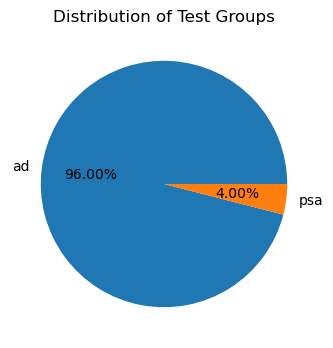

In [17]:
plt.figure(figsize = (6,4))
counts = df_cate['test group'].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title('Distribution of Test Groups')
plt.show()

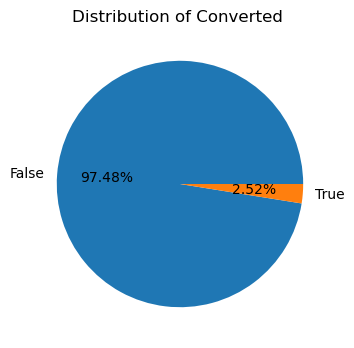

In [18]:
plt.figure(figsize = (6,4))
counts = df_cate['converted'].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title('Distribution of Converted ')
plt.show()

In [26]:
# Check converted for test group is psa 
filtered_df = df[df['test group'] == 'psa']
print(filtered_df)
print(filtered_df['converted'].unique())
print(filtered_df[filtered_df['converted']== True])

       test group  converted  total ads most ads day  most ads hour
18            psa      False        248     Saturday             19
38            psa      False         27     Thursday              8
68            psa      False         13      Tuesday             19
140           psa      False         32    Wednesday             19
157           psa      False        105      Tuesday             19
...           ...        ...        ...          ...            ...
588052        psa      False         16      Tuesday             22
588063        psa      False          3      Tuesday             22
588066        psa      False          1      Tuesday             22
588069        psa      False          6      Tuesday             22
588081        psa      False         16      Tuesday             23

[23524 rows x 5 columns]
[False  True]
       test group  converted  total ads most ads day  most ads hour
957           psa       True         88       Sunday             19
2531    

This means that there psa groups (420 rows) that are converted 

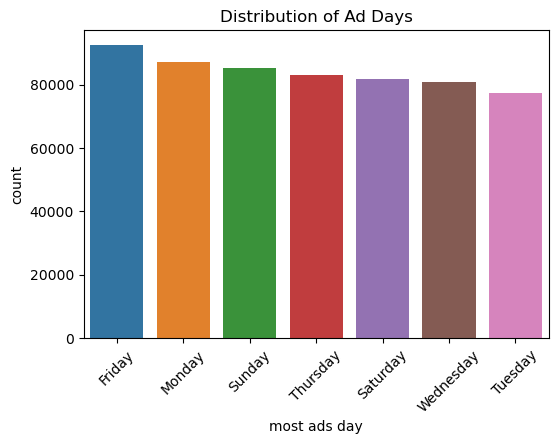

In [32]:
plt.figure(figsize = (6,4))
counts = df_cate['most ads day'].value_counts().index
sns.countplot(x = 'most ads day', data = df_cate, order = counts)
plt.xticks(rotation = 45)
plt.title('Distribution of Ad Days')
plt.show()

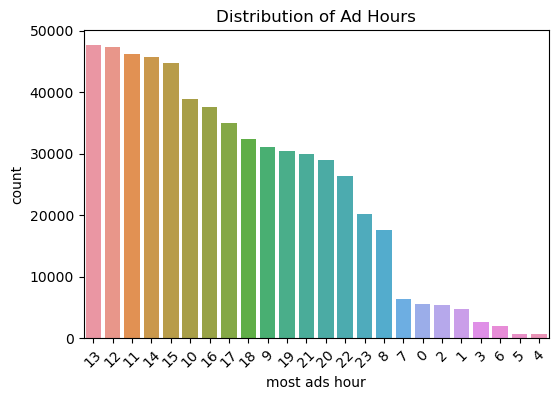

In [33]:
plt.figure(figsize = (6,4))
counts = df_cate['most ads hour'].value_counts().index
sns.countplot(x = 'most ads hour', data = df_cate, order = counts)
plt.xticks(rotation = 45)
plt.title('Distribution of Ad Hours')
plt.show()

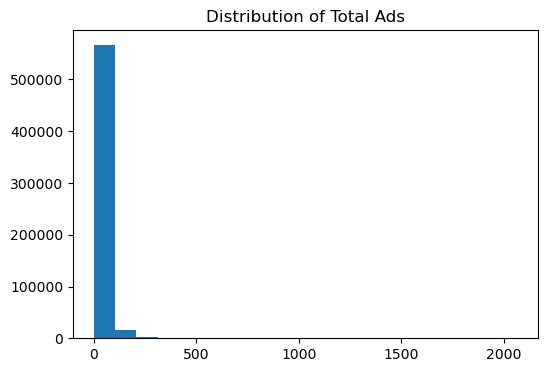

In [50]:
plt.figure(figsize = (6,4))
plt.hist(x = 'total ads', data = df, bins = 20)
#plt.xticks(np.arange(0, 500, 100))
plt.title('Distribution of Total Ads')
plt.show()

In [40]:
?plt.hist # to check function argument. 

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

In [51]:
# check descriptive stats for total ads
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [52]:
?pd.crosstab

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors.

By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
   

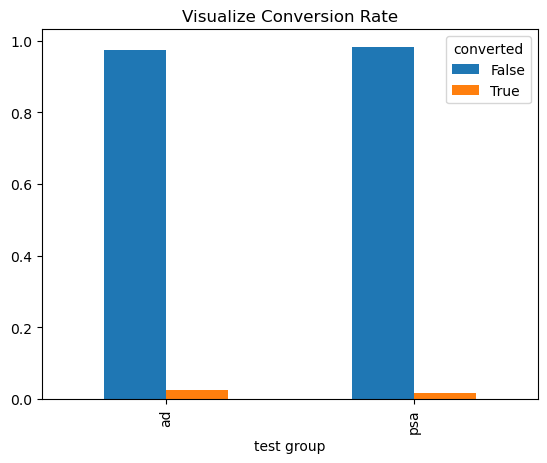

In [59]:
# determine how many ad converted and how many psa converted using crosstab funnction
conversion = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
conversion.plot.bar()
plt.title('Visualize Conversion Rate')
plt.show()

In [61]:
conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
conversion_day.sort_values(by = True, ascending = False)

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


This shows that Monday have the highest conversion rate

In [62]:
conversion_day = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
conversion_day.sort_values(by = True, ascending = False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


Maximum conversion rate occured mostly at 4pm (more likely to buy)

#### Performing a chi square to determine dependency between different categorical variable and the target variable (Converted)

In [64]:
from scipy.stats import chi2_contingency

In [67]:
# Check for relationship between variables and converted
# Null hypothesis: There is no difference in conversion rate between variables and converion 
alpha = 0.05 # level of siginifance
for variable in df_cate.columns:
    if variable != 'converted':
        conti_table = pd.crosstab(df_cate[variable], df_cate['converted'])
        chi2, p, _,_ = chi2_contingency(conti_table)
        print(variable)
        print(chi2)
        print(p)
        if p < alpha:
            print(f'Conversion rate in {variable} is statistically significant\n')
        else:
            print(f'There is no significant difference in conversion rate across {variable}')

test group
54.005823883685245
1.9989623063390075e-13
Conversion rate in test group is statistically significant

most ads day
410.0478857936585
1.932184379244731e-85
Conversion rate in most ads day is statistically significant

most ads hour
430.76869230822086
8.027629823696771e-77
Conversion rate in most ads hour is statistically significant



This tells us that there is a difference in conversion rate between people shown the ad and people who didn't see the ad 

In [68]:
# check for normality using Shapiro test
# levene test whether variance in different groups are equal 
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu 

In [70]:
# check normality of total ads for where converted is true and false
sst, sspt = shapiro(df[df['converted'] == True]['total ads'])
ssf, sspf = shapiro(df[df['converted'] == False]['total ads'])

In [72]:
print(f"{sspt} , {sspf}")

0.0 , 0.0


In [73]:
df.groupby('converted')['total ads'].mean()

converted
False    23.291495
True     83.887759
Name: total ads, dtype: float64

In [77]:
# if sspt and sspf > 0.05 then Normality assumption was met: Normally dstributed then perform 2 sample ttest
alpha = 0.05
if sspt > alpha and sspf > alpha:
    t_stat, t_pvalue = ttest_ind(df[df['converted']]['total ads'], df[~df['converetd']]['total ads'])
    print(f"u_pvalue = {t_pvalue}")
else:
    u_stat, u_pvalue = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"u_pvalue = {u_pvalue}")

u_pvalue = 0.0
